## Assignment 5
Name : Darshak Mehta  
Roll No. : 15ME33007
***

Importing the necessary files for the code  
- opencv
- numpy
- matplotlib for plotting

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

***
Reading the images as HSV files from the original BGR format

In [2]:
deer = cv2.imread('Deer.jpg')
tiger = cv2.imread('Tiger.jpg')

#CONVERSION TO HSV IMAGE
deerhsv = cv2.cvtColor(deer, cv2.COLOR_BGR2HSV)
tigerhsv = cv2.cvtColor(tiger, cv2.COLOR_BGR2HSV)

***
The range of saturation of an image is from 0-255.  
Convert the values of saturation for all the pixels to 255 will give maximally saturated image of the original one

In [3]:
#MAXIMALLY SATURATED IMAGE
deermaxsat = deerhsv
tigermaxsat = tigerhsv

deermaxsat[:,:,1] = 255
tigermaxsat[:,:,1] = 255

deermaxsat = cv2.cvtColor(deermaxsat, cv2.COLOR_HSV2BGR)
tigermaxsat = cv2.cvtColor(tigermaxsat, cv2.COLOR_HSV2BGR)

***
For desaturating the image we can reduce the value of saturation by dividing by a factor or subtracting it with a threshold.  
Here I have divided the value with a factor of 3

In [7]:
#DESATURATED IMAGE
deerdesat = deerhsv
tigerdesat = tigerhsv

#TAKING THE FACTOR AS 3
deerdesat[:,:,1] = deerdesat[:,:,1]/3
tigerdesat[:,:,1] = tigerdesat[:,:,1]/3

deerdesat = cv2.cvtColor(deerdesat, cv2.COLOR_HSV2BGR)
tigerdesat = cv2.cvtColor(tigerdesat, cv2.COLOR_HSV2BGR)

***
For a saturated-desaturated image, the pixel with a saturation value higher than 128 are increase by a certain threshold and the values lower are decreased by the same threshold.  
threshold taken as 50.

In [18]:
#SATURATED-DESATURATED IMAGE DEER
deersatdesat = deerhsv

#SPECIFYING THE FACTOR OF SATURATION AND DESATURATION
factor = 50

for i in range(0,deersatdesat.shape[0]):
    for j in range(0,deersatdesat.shape[1]):
        if deersatdesat[i,j,1]<128 & deersatdesat[i,j,1]>factor:
            deersatdesat[i,j,1] = deersatdesat[i,j,1]-factor
        elif deersatdesat[i,j,1]<factor:
            deersatdesat[i,j,1] = 0
        elif deersatdesat[i,j,1]>128 & deersatdesat[i,j,1]<255-factor:
            deersatdesat[i,j,1] = deersatdesat[i,j,1]+factor
        elif deersatdesat[i,j,1]>255-factor:
            deersatdesat[i,j,1] = 255
            
deersatdesat = cv2.cvtColor(deersatdesat, cv2.COLOR_HSV2BGR)


#SATURATED-DESATURATED IMAGE TIGER
tigersatdesat = tigerhsv

#SPECIFYING THE FACTOR OF SATURATION AND DESATURATION
factor = 50

for i in range(0,tigersatdesat.shape[0]):
    for j in range(0,tigersatdesat.shape[1]):
        if tigersatdesat[i,j,1]<128 & tigersatdesat[i,j,1]>factor:
            tigersatdesat[i,j,1] = tigersatdesat[i,j,1]-factor
        elif tigersatdesat[i,j,1]<factor:
            tigersatdesat[i,j,1] = 0
        elif tigersatdesat[i,j,1]>128 & tigersatdesat[i,j,1]<255-factor:
            tigersatdesat[i,j,1] = tigersatdesat[i,j,1]+factor
        elif tigersatdesat[i,j,1]>255-factor:
            tigersatdesat[i,j,1] = 255
            
tigersatdesat = cv2.cvtColor(tigersatdesat, cv2.COLOR_HSV2BGR)

***
***
Rest of the code shows all the required plots for different images.  
The BGR values are multiplied to the CIE matrix M to find XYZ values.  
These values provide the x,y values for the chromaticity graph which have been plotted for the respective images.

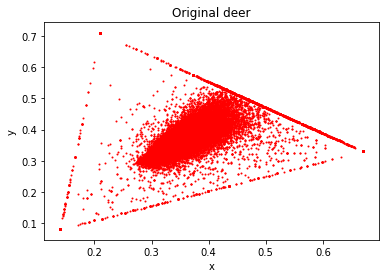

In [64]:
#PLOT OF CHROMATICITY POINTS FOR ORIGINAL DEER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(deer)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Original deer')
plt.xlabel('x')
plt.ylabel('y')
plt.show()        

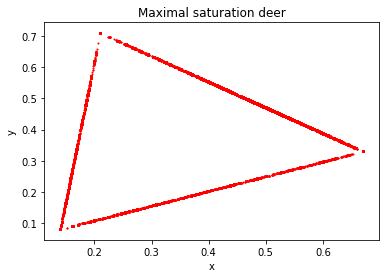

In [65]:
#PLOT OF CHROMATICITY POINTS FOR MAXIMALLY SATURATED DEER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(deermaxsat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Maximal saturation deer')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

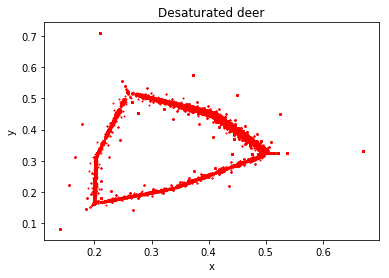

In [5]:
#PLOT OF CHROMATICITY POINTS FOR DESATURATED DEER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(deerdesat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Desaturated deer')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

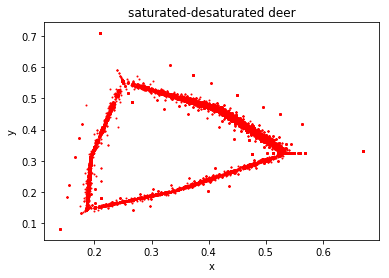

In [19]:
#PLOT OF CHROMATICITY POINTS FOR SATURATED-DESATURATED DEER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(deersatdesat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('saturated-desaturated deer')
plt.xlabel('x')
plt.ylabel('y')
plt.show()        

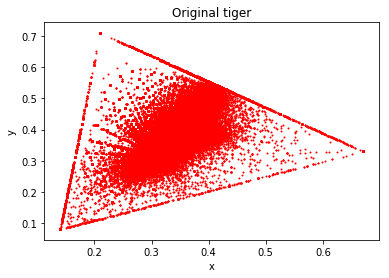

In [67]:
#PLOT OF CHROMATICITY POINTS FOR ORIGINAL TIGER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(tiger)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Original tiger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()       

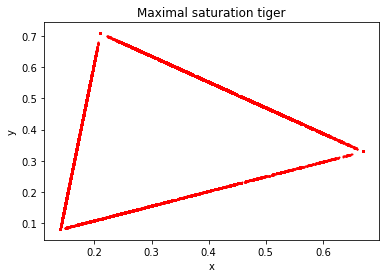

In [68]:
#PLOT OF CHROMATICITY POINTS FOR MAXIMALLY SATURATED TIGER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(tigermaxsat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Maximal saturation tiger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

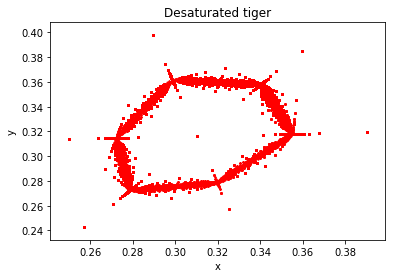

In [69]:
#PLOT OF CHROMATICITY POINTS FOR DESATURATED TIGER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(tigerdesat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('Desaturated tiger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#PLOT OF CHROMATICITY POINTS FOR SATURATED-DESATURATED TIGER
M = np.array([[0.6067,0.1736,0.2001],[0.2988,0.5868,0.1143],[0.0000,0.0661,1.1149]])
b,g,r = cv2.split(tigersatdesat)
b = b.ravel()
g = g.ravel()
r = r.ravel()
x = []
y = []
for i in range(0,len(b)):
    bgrmat = np.array([[r[i],g[i],b[i]]])
    XYZ = np.matmul(M,np.transpose(bgrmat))
    if (XYZ[0]+XYZ[1]+XYZ[2])!=0:
        xx = XYZ[0]/(XYZ[0]+XYZ[1]+XYZ[2])
        yy = XYZ[1]/(XYZ[0]+XYZ[1]+XYZ[2])
        x.append(xx)
        y.append(yy)
plt.scatter(x, y, color = 'red',s=1)
plt.title('saturated-desaturated tiger')
plt.xlabel('x')
plt.ylabel('y')
plt.show()        

In [17]:
#ALL THE IMAGES OF DEER
cv2.imshow("Original deer", deer)
cv2.imshow("Maximally saturation deer", deermaxsat)
cv2.imshow("Desaturated deer", deerdesat)
cv2.imshow("Saturated-desaturated deer", deersatdesat)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
#ALL THE IMAGES OF TIGER
cv2.imshow("Original tiger", tiger)
cv2.imshow("Maximally saturation tiger", tigermaxsat)
cv2.imshow("Desaturated tiger", tigerdesat)
cv2.imshow("Saturated-desaturated tiger", tigersatdesat)
cv2.waitKey(0)
cv2.destroyAllWindows()